In [8]:
import numpy as np
import proplot as plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
# from proplot.utils import _timer

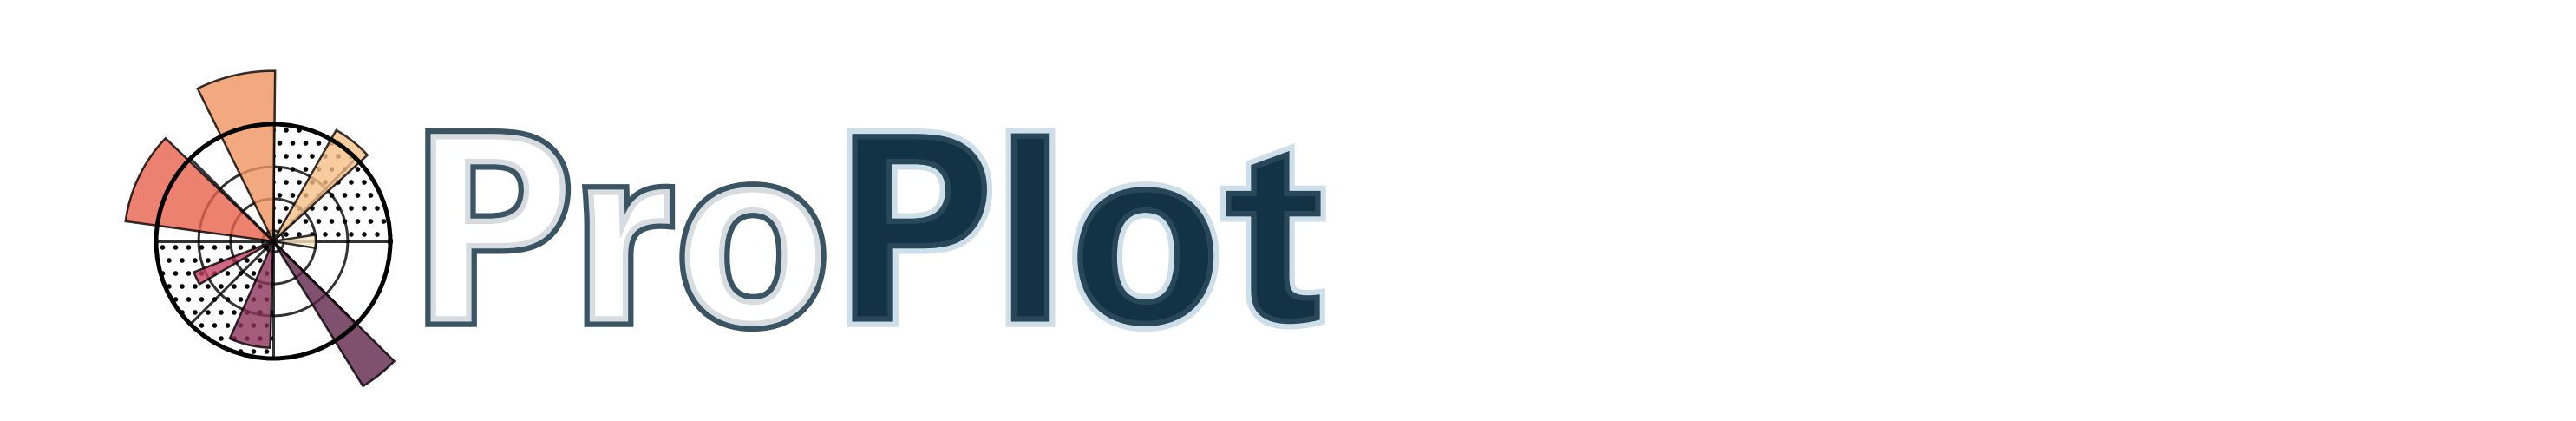

In [60]:
### import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def add_math_background():
    text = []
    text.append(
        (r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
         r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2}"
         r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 "
         r"\left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - "
         r"\alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} "
         r"}{U^{0\beta}_{\rho_1 \sigma_2}}\right]$", (0.7, 0.2), 20))
    text.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} "
                 r"= -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$",
                 (0.35, 0.9), 20))
    text.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$",
                 (0.15, 0.3), 25))
    text.append((r"$F_G = G\frac{m_1m_2}{r^2}$",
                 (0.85, 0.7), 30))
    for eq, (x, y), size in text:
        ax.text(x, y, eq, ha='center', va='center', color="#11557c",
                alpha=0.25, transform=ax.transAxes, fontsize=size)
    ax.set_axis_off()
    return ax


def add_matplotlib_text(fs=60):
    a = 0.8
    color = '#11557c'
    color = plot.shade(color, 0.5)
    off = 0.0
    ax.text(0.5 - off, 0.5, 'Pro', color=color, fontsize=fs, name='dejavu sans',
            weight='demi', style='italic',
            invert=1,
            ha='right', va='center', alpha=a, border=True, lw=5, transform='axes')
    ax.text(0.5 - off, 0.5, 'Plot', color=color, fontsize=fs, name='helvetica', invert=0,
            ha='left', va='center', alpha=a, border=True, lw=4, transform='axes',
            weight='bold')
    
def add_long_text(fs=60):
    a = 0.8
    color0 = '#11557c'
    color1 = plot.saturate(plot.shade(color0, 2.5), 0.8)
    color1 = plot.shade(color0, 0.5)
    color2 = plot.shade(color0, 0.5)
    off = 0.0
    y = 0.45
    lw = 5
    bcolor = 'w'
    plot.rc.fontname = 'Avenir'
    plot.rc.fontname = 'Univers'
    ax.text(1.1, y, 'Pro', color=color1, fontsize=fs,
            weight='bold', invert=1,
            ha='left', va='center', alpha=a, border=True, lw=lw, transform='axes')
    ax.text(2.9, y, 'Plot', color=color2, fontsize=fs,
            ha='left', va='center', alpha=a, border=True,
            bordercolor=plot.saturate(plot.shade(color0, 3), 0.5), lw=lw, transform='axes',
            weight='bold')
    
def add_polar_bar():
    ax.patch.set_alpha(axalpha)
    ax.set_axisbelow(True)
    N = 7
    arc = 2. * np.pi
    theta = np.arange(0.0, arc, arc/N)
    radii = 20 * np.array([0.2, 0.6, 0.8, 0.7, 0.4, 0.5, 0.8])
    width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
    # Bars
    bars = ax.bar(theta, radii, width=width, bottom=0.0, clip_on=False, linewidth=1, edgecolor='k')
    colors = plot.colors('fire', len(bars), left=0.1)
    for r, bar, color in zip(radii, bars, colors):
        bar.set_facecolor(color)
        bar.set_alpha(0.8)
    # Ticks
    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    ax.set_yticks(np.arange(1, 10, 3))
    ax.set_rmax(11)
    # Add dots
    for x in 0, np.pi:
        rect = mpatches.Rectangle((x,0),np.pi/2,100,linewidth=0, facecolor='none', edgecolor='k', hatch='..', zorder=0)
        ax.add_patch(rect)

# Plot data
# main_axes = add_math_background()
for i,name in enumerate(['icon.png', 'logo.png', 'long.png']):
    if 'long' not in name:
        continue
    # Settings
    k = 'gray7'
    plot.rc.axeshatch = 'x'
    plot.rc.hatchalpha = 0.5
    plot.rc.hatchcolor = 'gray8'
    plot.rc.gridalpha = 0.8
    if i==1:
        plot.rc.linewidth = 1
        plot.rc.gridlinewidth = 1
    else:
        plot.rc.linewidth = 2
        plot.rc.gridlinewidth = 1.2
    plot.rc['hatch.linewidth'] = 1
    # Figure
    axalpha = 0.05
    figcolor = 'white'
    # figcolor = 'gray'
    dpi = 80
    if i==1:
        kw = {'axwidth':3, 'right':1, 'left':1}
    elif i==2:
        kw = {'axwidth':1.5, 'right':14, 'left':1}
    else:
        kw = {'axwidth':3, 'right':0.2, 'left':0.5}
    fig, ax = plot.subplots(proj='polar', tight=False, bottom=0.4, top=0.8, **kw)
    fig.patch.set_edgecolor(figcolor)
    fig.patch.set_facecolor(figcolor)
    # Content
    add_polar_bar()
    ax.patch.set_color('w')
    if i==1:
        add_matplotlib_text(90)
        ax.patch.set_alpha(0.8)
        dpi = 150
    elif i==2:
        add_long_text(120)
        ax.patch.set_alpha(0.8)
        dpi = 300
    elif i==0:
        ax.patch.set_alpha(1)
        dpi = 50
    ax.format()
    fig.patch.set_alpha(0)
    fig.save(f'~/proplot/docs/_static/{name}', dpi=dpi, transparent=False) # real size is 4in by 4in